In [154]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from google.colab                import drive

pd.set_option('display.max_columns', 500)

In [155]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [156]:
df_am = pd.read_csv('/content/gdrive/MyDrive/Datasets/base_covid_AM/base.csv', sep=';', low_memory=False, parse_dates=['_dt_notificacao','_dt_evolucao','_dt_sintomas'])
df_am = df_am.drop(['_etnia', '_faixa etária', '_raca',
                    '_conclusao', '_se_notificacao', '_evolução','_origem',
                    '_distrito', '_bairro_mapa','_dt_evolucao', '_dt_notificacao', '_dt_sintomas'], axis = 1)

### Tratamento e análise exploratória dos dados

In [157]:
df_am[['_comorb_cardio', '_comorb_cromossomica',
       '_comorb_diabetes', '_comorb_hemato', '_comorb_hepatica',
       '_comorb_imuno', '_comorb_neurologica', '_comorb_obessidade',
       '_comorb_renal', '_comorb_respiratoria','_gestante', '_profiss_saude',
       '_sintoma_dispneia', '_sintoma_febre', '_sintoma_garganta',
       '_sintoma_tosse','_sintoma_olfato', '_sintoma_paladar','_sintoma_outros']] = df_am[['_comorb_cardio', '_comorb_cromossomica',
       '_comorb_diabetes', '_comorb_hemato', '_comorb_hepatica',
       '_comorb_imuno', '_comorb_neurologica', '_comorb_obessidade',
       '_comorb_renal', '_comorb_respiratoria','_gestante', '_profiss_saude',
       '_sintoma_dispneia', '_sintoma_febre', '_sintoma_garganta',
       '_sintoma_tosse','_sintoma_olfato', '_sintoma_paladar', '_sintoma_outros']].replace('Sim', 1).fillna(0).astype('int64')

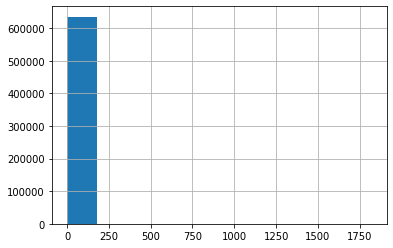

In [158]:
#Variável de idade fora do padrão
df_am['_idade'].hist()

In [159]:
df_am = df_am[(df_am['_idade'] >= 18.0) & (df_am['_idade'] <= 100.0)]
df_am['_idade'] = df_am['_idade'].fillna(df_am['_idade'].median()).astype('int64')

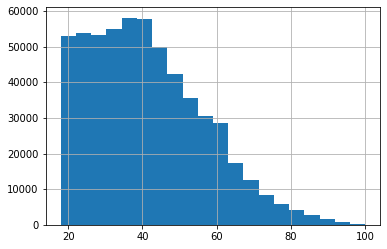

In [160]:
df_am['_idade'].hist(bins=20)

### Feature Engineering

In [161]:
df_am.head(7)

,_classificacao,_comorb_cardio,_comorb_cromossomica,_comorb_diabetes,_comorb_hemato,_comorb_hepatica,_comorb_imuno,_comorb_neurologica,_comorb_obessidade,_comorb_renal,_comorb_respiratoria,_criterio,_idade,_gestante,_profiss_saude,_sexo,_sintoma_dispneia,_sintoma_febre,_sintoma_garganta,_sintoma_tosse,_bairro,_sintoma_olfato,_sintoma_paladar,_sintoma_outros,_srag,_taxa,_teste_anticorpo,_teste_antigeno,_teste_pcr,_srag_agente
1,Confirmado,0,0,0,0,0,0,0,0,0,0,Laboratorial,26,0,0,F,1,1,1,1,TARUMA-ACU,0,0,1,SRAG por influenza,"0,684931507",NaN,1.0,1.0,Influenza B
2,Descartado,0,0,0,0,0,0,0,0,0,0,Laboratorial,27,0,0,M,1,1,1,1,JORGE TEIXEIRA,0,0,1,SRAG não especificado,"0,073137374",NaN,1.0,1.0,NaN
3,Descartado,0,0,0,0,0,0,0,0,0,0,Laboratorial,94,0,0,M,1,1,1,1,FLORES,0,0,1,SRAG não especificado,"0,198306463",NaN,1.0,1.0,NaN
8,Descartado,0,0,0,0,0,0,0,0,0,0,Laboratorial,28,0,0,F,1,1,0,1,CIDADE DE DEUS,0,0,1,SRAG não especificado,"0,117699678",NaN,1.0,1.0,NaN
9,Descartado,1,0,0,0,0,0,0,0,0,0,Laboratorial,80,0,0,M,1,1,0,1,PETROPOLIS,0,0,1,SRAG não especificado,"0,232948192",NaN,1.0,1.0,NaN
10,Confirmado,1,0,1,0,0,0,0,0,0,1,Laboratorial,74,0,0,M,1,1,1,1,CACHOEIRINHA,0,0,1,SRAG por influenza,"0,514403292",NaN,1.0,1.0,Influenza B
11,Descartado,0,0,0,0,0,0,0,0,0,0,Critério Clínico,23,1,0,F,0,1,1,1,SANTA ETELVINA,0,0,1,SRAG não especificado,"0,314386318",NaN,NaN,NaN,NaN


In [162]:
df_am['grupo_de_risco'] = df_am['_idade'].apply(lambda x: 1 if (x >= 60) else 0)

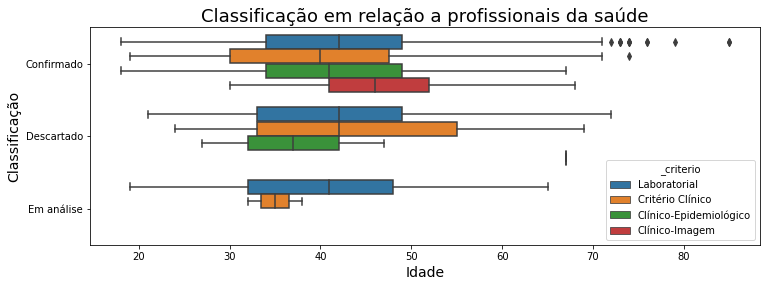

In [163]:
ax = sn.boxplot(x = '_idade', y ='_classificacao', data = df_am.loc[df_am['_profiss_saude']==1], orient='h', hue='_criterio')
ax.figure.set_size_inches(12, 4)
ax.set_title('Classificação em relação a profissionais da saúde', fontsize=18)
ax.set_ylabel('Classificação', fontsize=14)
ax.set_xlabel('Idade', fontsize=14)
ax

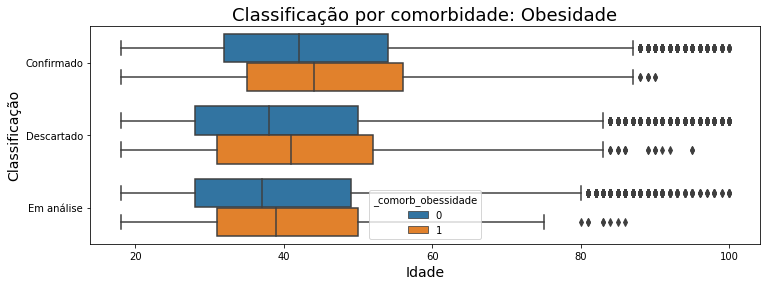

In [164]:
ax = sn.boxplot(x = '_idade', y ='_classificacao', data = df_am, orient='h', hue='_comorb_obessidade')
ax.figure.set_size_inches(12, 4)
ax.set_title('Classificação por comorbidade: Obesidade', fontsize=18)
ax.set_ylabel('Classificação', fontsize=14)
ax.set_xlabel('Idade', fontsize=14)
ax

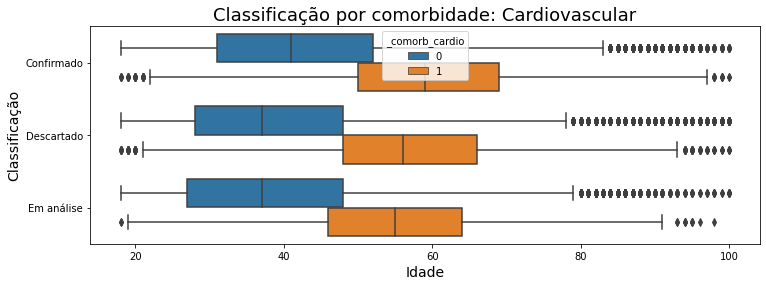

In [165]:
ax = sn.boxplot(x = '_idade', y ='_classificacao', data = df_am, orient='h', hue='_comorb_cardio')
ax.figure.set_size_inches(12, 4)
ax.set_title('Classificação por comorbidade: Cardiovascular', fontsize=18)
ax.set_ylabel('Classificação', fontsize=14)
ax.set_xlabel('Idade', fontsize=14)
ax

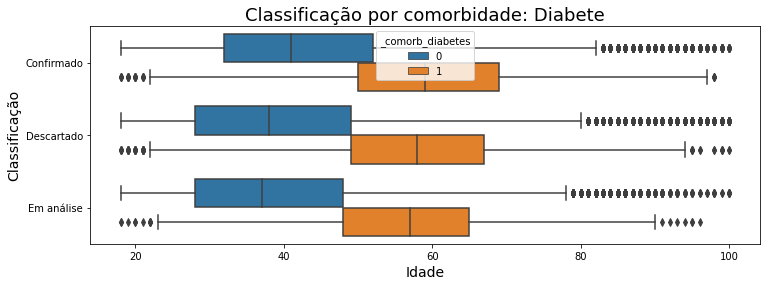

In [166]:
ax = sn.boxplot(x = '_idade', y ='_classificacao', data = df_am, orient='h', hue='_comorb_diabetes')
ax.figure.set_size_inches(12, 4)
ax.set_title('Classificação por comorbidade: Diabete', fontsize=18)
ax.set_ylabel('Classificação', fontsize=14)
ax.set_xlabel('Idade', fontsize=14)
ax

In [167]:
df_am['_criterio'].value_counts(), df_am['_criterio'].isnull().sum()

(Laboratorial              101300
 Critério Clínico           12703
 Clínico-Epidemiológico      4699
 Clínico-Imagem              4077
 Name: _criterio, dtype: int64, 448277)

In [168]:
df_am[['_classificacao','_criterio','_bairro','_srag','_srag_agente']] = df_am[['_classificacao','_criterio','_bairro','_srag','_srag_agente']].astype('category').apply(lambda x: x.cat.codes)

In [169]:
df_am.head()

,_classificacao,_comorb_cardio,_comorb_cromossomica,_comorb_diabetes,_comorb_hemato,_comorb_hepatica,_comorb_imuno,_comorb_neurologica,_comorb_obessidade,_comorb_renal,_comorb_respiratoria,_criterio,_idade,_gestante,_profiss_saude,_sexo,_sintoma_dispneia,_sintoma_febre,_sintoma_garganta,_sintoma_tosse,_bairro,_sintoma_olfato,_sintoma_paladar,_sintoma_outros,_srag,_taxa,_teste_anticorpo,_teste_antigeno,_teste_pcr,_srag_agente,grupo_de_risco
1,0,0,0,0,0,0,0,0,0,0,0,3,26,0,0,F,1,1,1,1,11089,0,0,1,2,"0,684931507",NaN,1.0,1.0,3,0
2,1,0,0,0,0,0,0,0,0,0,0,3,27,0,0,M,1,1,1,1,5622,0,0,1,0,"0,073137374",NaN,1.0,1.0,-1,0
3,1,0,0,0,0,0,0,0,0,0,0,3,94,0,0,M,1,1,1,1,4813,0,0,1,0,"0,198306463",NaN,1.0,1.0,-1,1
8,1,0,0,0,0,0,0,0,0,0,0,3,28,0,0,F,1,1,0,1,2111,0,0,1,0,"0,117699678",NaN,1.0,1.0,-1,0
9,1,1,0,0,0,0,0,0,0,0,0,3,80,0,0,M,1,1,0,1,8665,0,0,1,0,"0,232948192",NaN,1.0,1.0,-1,1
